In [13]:
import os 
import pandas as pd 
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
import seaborn as sns
import cv2
from tensorflow.keras.models import load_model
import numpy as np

from tensorflow.keras.applications.mobilenet_v2 import preprocess_input
from sklearn.metrics import confusion_matrix,accuracy_score
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [2]:

data_dir = 'D:\\blood_cell\\dataset2-master\\dataset2-master\\images\\TRAIN'


class_labels=['EOSINOPHIL','LYMPHOCYTE','MONOCYTE','NEUTROPHIL']

In [3]:
filepaths = []
labels = []

for label in class_labels:
    class_dir =os.path.join(data_dir,label)
    for file in os.listdir(class_dir):
        if file.endswith('.jpeg') or file.endswith('.png'):
            filepaths.append(os.path.join(class_dir,file))
            labels.append(label)

In [4]:
bloodCell_df=pd.DataFrame({
'filepaths': filepaths,
'labels': labels
})

In [5]:
bloodCell_df= bloodCell_df.sample(frac=1).reset_index(drop=True)

In [6]:
bloodCell_df.head()

,filepaths,labels
0,D:\blood_cell\dataset2-master\dataset2-master\...,EOSINOPHIL
1,D:\blood_cell\dataset2-master\dataset2-master\...,NEUTROPHIL
2,D:\blood_cell\dataset2-master\dataset2-master\...,MONOCYTE
3,D:\blood_cell\dataset2-master\dataset2-master\...,NEUTROPHIL
4,D:\blood_cell\dataset2-master\dataset2-master\...,EOSINOPHIL


In [ ]:
import matplotlib.pyplot as plt
import numpy as np

def show_knee_images(image_gen):
    test_dict = test.class_indices
    classes = list(test_dict.keys())
    images, labels = next(image_gen)
    
    plt.figure(figsize=(20, 20))
    length = len(labels)
    
    if length < 25:
        r = length
    else:
        r = 25

    for i in range(r):
        plt.subplot(5, 5, i + 1)
        image = (images[i] + 1) / 2
        plt.imshow(image)
        index = np.argmax(labels[i])
        class_name = classes[index]
        plt.title(class_name, color="green", fontsize=16)
        plt.axis('off')

    plt.show()

# Example call
show_knee_images(train)


In [7]:
from sklearn.model_selection import train_test_split

# First split: training and testing
train_images, test_images = train_test_split(bloodCell_df, test_size=0.3, random_state=42)

# Second split: training and validation
train_set, val_set = train_test_split(bloodCell_df, test_size=0.2, random_state=42)

# Display shapes
print(train_set.shape)
print(test_images.shape)
print(val_set.shape)
print(train_images.shape)


(7965, 2)
(2988, 2)
(1992, 2)
(6969, 2)


In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

image_gen = ImageDataGenerator(
    preprocessing_function=tf.keras.applications.mobilenet_v2.preprocess_input
)

train = image_gen.flow_from_dataframe(
    dataframe=train_set,x_col="filepaths",y_col="labels",target_size=(244, 244),color_mode='rgb',class_mode="categorical",batch_size=8,shuffle=False
)

test = image_gen.flow_from_dataframe(
    dataframe=test_images,x_col="filepaths",y_col="labels",target_size=(244, 244),color_mode='rgb',class_mode="categorical",batch_size=8,shuffle=False
)

val = image_gen.flow_from_dataframe(
    dataframe=val_set,x_col="filepaths",y_col="labels",target_size=(244, 244),color_mode='rgb',class_mode="categorical",batch_size=8,shuffle=False
)


Found 7965 validated image filenames belonging to 4 classes.
Found 2988 validated image filenames belonging to 4 classes.
Found 1992 validated image filenames belonging to 4 classes.


In [9]:
model = keras.models.Sequential([
    keras.layers.Conv2D(filters=128, kernel_size=(8, 8), strides=(3, 3), activation='relu', input_shape=(224, 224, 3)),
    keras.layers.BatchNormalization(),

    keras.layers.Conv2D(filters=256, kernel_size=(5, 5), strides=(1, 1), activation='relu', padding="same"),
    keras.layers.BatchNormalization(),
    keras.layers.MaxPool2D(pool_size=(3, 3)),

    keras.layers.Conv2D(filters=256, kernel_size=(3, 3), strides=(1, 1), activation='relu', padding="same"),
    keras.layers.BatchNormalization(),

    keras.layers.Conv2D(filters=256, kernel_size=(1, 1), strides=(1, 1), activation='relu', padding="same"),
    keras.layers.Conv2D(filters=256, kernel_size=(1, 1), strides=(1, 1), activation='relu', padding="same"),
    keras.layers.BatchNormalization(),

    keras.layers.Conv2D(filters=512, kernel_size=(3, 3), activation='relu', padding="same"),
    keras.layers.BatchNormalization(),
    keras.layers.MaxPool2D(pool_size=(2, 2)),

    keras.layers.Conv2D(filters=512, kernel_size=(3, 3), activation='relu', padding="same"),
    keras.layers.BatchNormalization(),

    keras.layers.Conv2D(filters=512, kernel_size=(3, 3), activation='relu', padding="same"),
    keras.layers.BatchNormalization(),
    keras.layers.MaxPool2D(pool_size=(2, 2)),

    keras.layers.Conv2D(filters=512, kernel_size=(3, 3), activation='relu', padding="same"),
    keras.layers.BatchNormalization(),
    keras.layers.MaxPool2D(pool_size=(2, 2)),

    keras.layers.Flatten(),
    keras.layers.Dense(1024, activation='relu'),
    keras.layers.Dropout(0.5),
    keras.layers.Dense(1024, activation='relu'),
    keras.layers.Dropout(0.5),
    keras.layers.Dense(4, activation='softmax')
])

model.compile(
    loss='categorical_crossentropy',
    optimizer=tf.optimizers.SGD(learning_rate=0.001),
    metrics=['accuracy']
)

model.summary()


c:\Users\Admin\anaconda3\anoconda 3\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 73, 73, 128)    │        24,704 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 73, 73, 128)    │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 73, 73, 256)    │       819,456 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 73, 73, 256)    │         1,024 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 24, 24, 256)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 24, 24, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_2           │ (None, 24, 24, 256)    │         1,024 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 24, 24, 256)    │        65,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 24, 24, 256)    │        65,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_3           │ (None, 24, 24, 256)    │         1,024 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 24, 24, 512)    │     1,180,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_4           │ (None, 24, 24, 512)    │         2,048 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 12, 12, 512)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_6 (Conv2D)               │ (None, 12, 12, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_5           │ (None, 12, 12, 512)    │         2,048 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_7 (Conv2D)               │ (None, 12, 12, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_6           │ (None, 12, 12, 512)    │         2,048 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 6, 6, 512)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_8 (Conv2D)               │ (None, 6, 6, 512)      │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_7           │ (None, 6, 6, 512)      │         2,048 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 3, 3, 512)      │             

 Total params: 15,610,500 (59.55 MB)

 Trainable params: 15,604,612 (59.53 MB)

 Non-trainable params: 5,888 (23.00 KB)

In [10]:
history =model.fit(train,epochs=5,validation_data=val,verbose=1)

c:\Users\Admin\anaconda3\anoconda 3\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/5
996/996 ━━━━━━━━━━━━━━━━━━━━ 1383s 1s/step - accuracy: 0.3161 - loss: 1.9856 - val_accuracy: 0.5658 - val_loss: 1.0099
Epoch 2/5
996/996 ━━━━━━━━━━━━━━━━━━━━ 1262s 1s/step - accuracy: 0.5281 - loss: 1.0694 - val_accuracy: 0.7264 - val_loss: 0.6527
Epoch 3/5
996/996 ━━━━━━━━━━━━━━━━━━━━ 1117s 1s/step - accuracy: 0.6890 - loss: 0.7207 - val_accuracy: 0.7942 - val_loss: 0.4625
Epoch 4/5
996/996 ━━━━━━━━━━━━━━━━━━━━ 1137s 1s/step - accuracy: 0.7955 - loss: 0.5012 - val_accuracy: 0.8409 - val_loss: 0.4026
Epoch 5/5
996/996 ━━━━━━━━━━━━━━━━━━━━ 1124s 1s/step - accuracy: 0.8693 - loss: 0.3268 - val_accuracy: 0.8981 - val_loss: 0.2536


In [11]:
history1=model.fit(train,epochs=1,validation_data=val,verbose=1)

996/996 ━━━━━━━━━━━━━━━━━━━━ 1083s 1s/step - accuracy: 0.9031 - loss: 0.2547 - val_accuracy: 0.9172 - val_loss: 0.2093


In [14]:
pred = model.predict(test)
pred = np.argmax(pred,axis=1)

labels=(train.class_indices)
labels=dict((v,k)for k,v in labels.items())
pred2=[labels[k] for k in pred ]

374/374 ━━━━━━━━━━━━━━━━━━━━ 92s 246ms/step


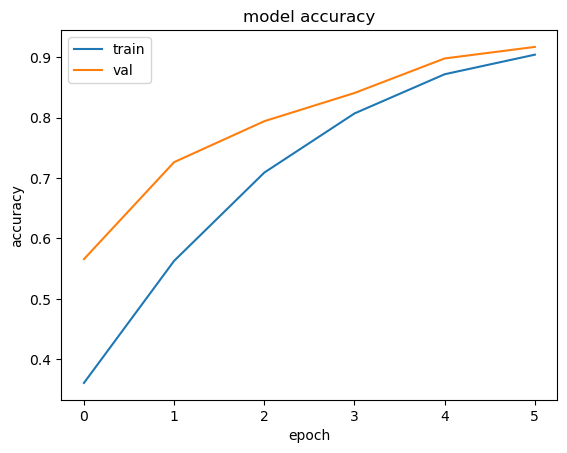

In [15]:
plt.plot(history.history['accuracy']+history1.history['accuracy'])
plt.plot(history.history['val_accuracy']+history1.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel("epoch")
plt.legend(['train','val'], loc ="upper left")
plt.show()

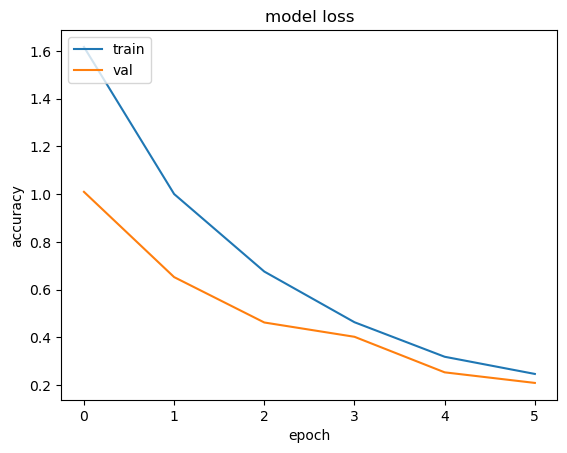

In [16]:
plt.plot(history.history['loss']+history1.history['loss'])
plt.plot(history.history['val_loss']+history1.history['val_loss'])
plt.title('model loss')
plt.ylabel('accuracy')
plt.xlabel("epoch")
plt.legend(['train','val'], loc ="upper left")
plt.show()

In [17]:
from sklearn.metrics import confusion_matrix,accuracy_score
from sklearn.metrics import classification_report

y_test=test_images.labels
print(classification_report(y_test,pred2))
print("Accuracy of the model : ","{:.1f}%".format(accuracy_score(y_test,pred2)*100))

              precision    recall  f1-score   support

  EOSINOPHIL       0.95      0.79      0.86       778
  LYMPHOCYTE       0.99      0.99      0.99       721
    MONOCYTE       0.97      1.00      0.99       744
  NEUTROPHIL       0.82      0.94      0.88       745

    accuracy                           0.93      2988
   macro avg       0.93      0.93      0.93      2988
weighted avg       0.93      0.93      0.93      2988

Accuracy of the model :  92.8%


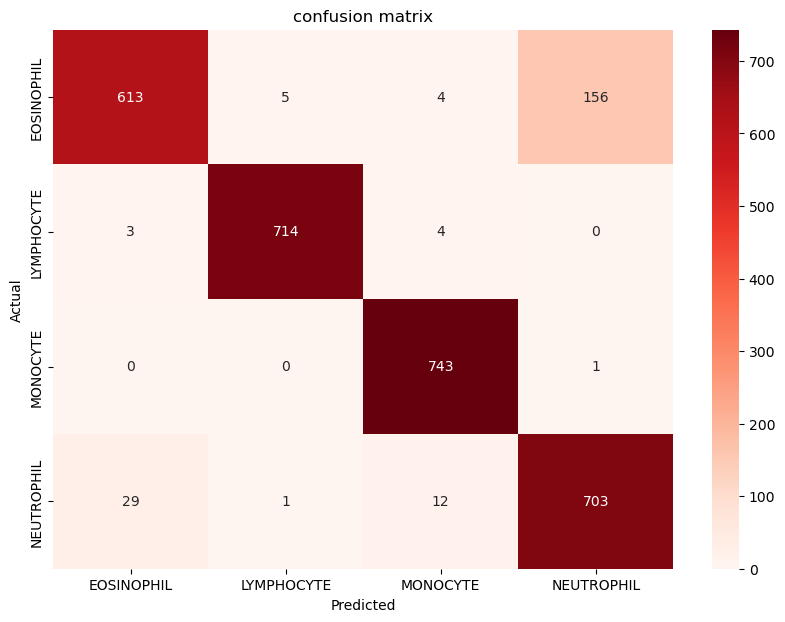

In [21]:
cm=confusion_matrix(y_test,pred2)

plt.figure(figsize=(10,7))
sns.heatmap(cm, annot=True,fmt='g',vmin=0,cmap="Reds")

plt.xticks(ticks=[0.5,1.5,2.5,3.5],labels=class_labels)
plt.yticks(ticks=[0.5,1.5,2.5,3.5],labels=class_labels)
plt.xlabel("Predicted")
plt.ylabel("Actual")

plt.title("confusion matrix")
plt.show()

In [22]:
model.save("Blood cell.h5")